# TD4 - Geometric transformations

ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

In [4]:
%matplotlib inline
from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from skimage import data
from skimage import transform as tf

## 1. Understanding homogenous coordinates and geometric transformations

The following code defines transformation matrices for 2-dimensional points using the homogenous convention. You are asked to:

**a)** Recreate different cases of transformation seen on the lecture (add the shear and projective components)

**b)** Change the order of the composition of several transformations (e.g. RTS vs STR) and explain the differences. In which cases does the order matter?

**d)** Add the color information. In addition to showing the displacement of the grid coordinates, add the image intensity at each destination location. Hints: create a new grid with the size of the input image, give the right color to each point in the scatter function by using the parameter *c=*.

**e)** Create and display the image resulting from the direct application of the transformation. First, create an empty array full of zeros with the appropriate size to contain the image. Then, discretize the values of the coordinates. Finally, fill the pixels with the image content. What is the problem? How to solve it?
**Hint:** We are trying to go back to the image representation. So do not use scatter points here but imshow.

translation
 [[1 0 1]
 [0 1 1]
 [0 0 1]]
rotation
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
scale
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
Full transfo
 [[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.1 0. ]]
coord list shape after transformation (3, 200)


<ipython-input-23-5ee88cba4d0b>:69: RuntimeWarning: divide by zero encountered in true_divide
  transformedCoords[0,:] = transformedCoords[0,:]/transformedCoords[2,:]
<ipython-input-23-5ee88cba4d0b>:69: RuntimeWarning: invalid value encountered in true_divide
  transformedCoords[0,:] = transformedCoords[0,:]/transformedCoords[2,:]
<ipython-input-23-5ee88cba4d0b>:70: RuntimeWarning: invalid value encountered in true_divide
  transformedCoords[1,:] = transformedCoords[1,:]/transformedCoords[2,:]


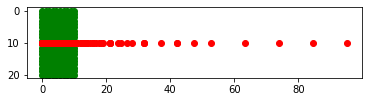

In [23]:
#define the transformation parameters parameters
tx = -5 # horizontal translation
ty = -10 # vertical translation 
theta = np.pi/4 #rotation angle in radians 
sx = 1 # horizontal scale
sy = 1 # vertical scale
shearx = 1
sheary = 0


#Create the transformation matrices
T = np.array([
    [1, 0, 1 ],
    [0, 1, 1 ],
    [0, 0, 1]])

R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]])

S = np.array([
    [sx, 0, 0 ],
    [0, sy, 0 ],
    [0, 0, 1]])


# FILL IN here additional shear and projective components

SH = np.array([
    [1, shearx, 0 ],
    [sheary, 1, 0 ],
    [0, 0, 1]])

PROJ = np.array([
    [1, 0, 0 ],
    [0, 1, 0 ],
    [0, 0.1, 0]])



print('translation\n',T)
print('rotation\n',R)
print('scale\n',S)

#Compose a single transformation matrix with the three types of transformations

#transfo = np.matmul(T,np.matmul(R,S))
transfo = PROJ
#transfo = np.matmul(S,np.matmul(R,T))

# FILL IN additional transformations

print('Full transfo\n',transfo)


#Creating a grid of image coordinates
height = 20
width = 10
x = np.linspace(0, width, width)
y = np.linspace(0, height, height)
xx,yy = np.meshgrid(x,y)
coords = np.vstack((xx.ravel(), yy.ravel(), np.ones(width*height)))

#Apply the transformation to the coordinates list
transformedCoords = np.matmul(transfo,coords)

#Normalizing in case of perspective components
transformedCoords[0,:] = transformedCoords[0,:]/transformedCoords[2,:]
transformedCoords[1,:] = transformedCoords[1,:]/transformedCoords[2,:]
print('coord list shape after transformation',transformedCoords.shape)

#Showing the original(green) and transformed coordinates (red)
fig1, ax1 = plt.subplots()
plt.scatter(coords[0,:],coords[1,:],color='g')
plt.scatter(transformedCoords[0,:],transformedCoords[1,:],color='r')
ax1.invert_yaxis()
ax1.set_aspect('equal')
plt.show()



Full transfo
 [[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.1 0. ]]


<ipython-input-29-774321c19b73>:29: RuntimeWarning: divide by zero encountered in true_divide
  transformedCoords[0,:] = transformedCoords[0,:]/transformedCoords[2,:]
<ipython-input-29-774321c19b73>:29: RuntimeWarning: invalid value encountered in true_divide
  transformedCoords[0,:] = transformedCoords[0,:]/transformedCoords[2,:]
<ipython-input-29-774321c19b73>:30: RuntimeWarning: invalid value encountered in true_divide
  transformedCoords[1,:] = transformedCoords[1,:]/transformedCoords[2,:]


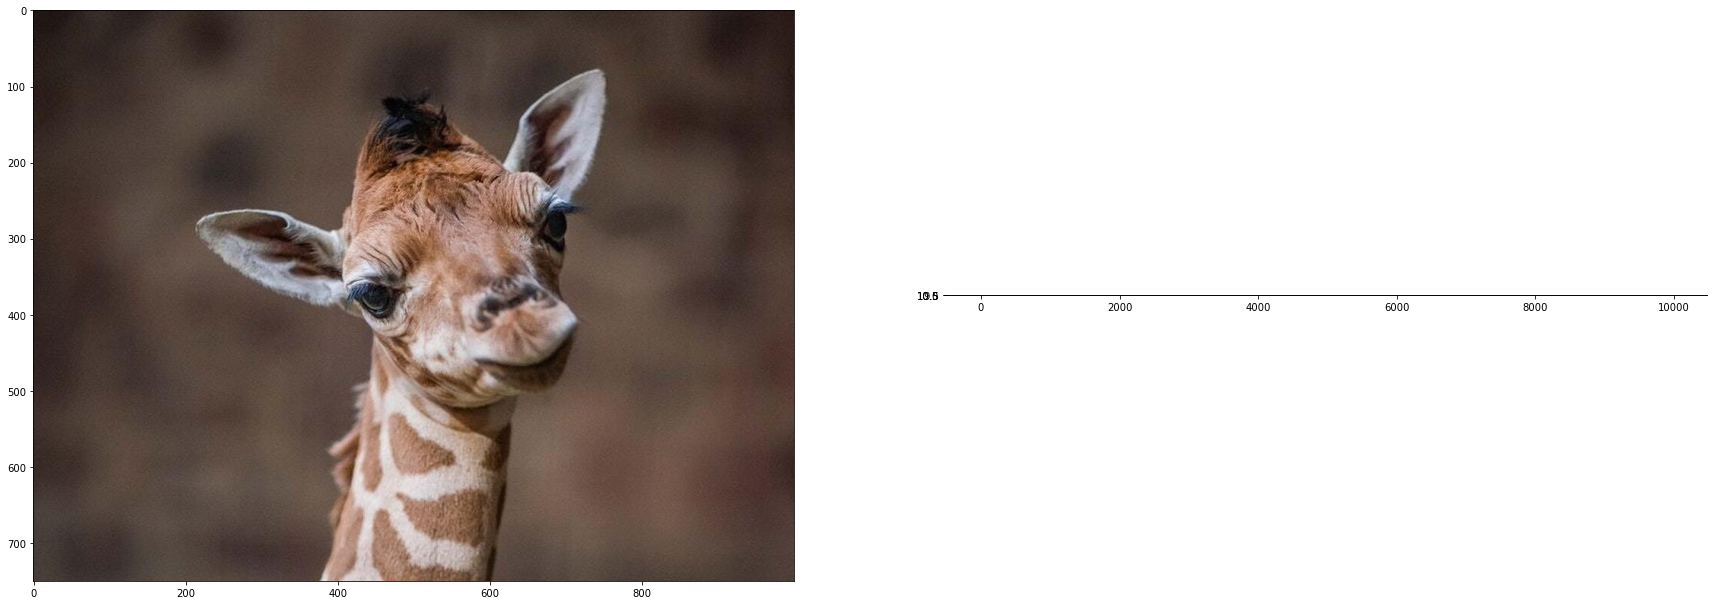

In [29]:
#d) Showing the transformation on an image
from skimage import data
from skimage.transform import resize, rescale
import skimage.io as io
from matplotlib import pyplot as plt


print('Full transfo\n',transfo)

# APPLYING THE TRANSFORMATION TO A GRID OF THE SIZE OF THE IMAGE
image = data.camera()
image = io.imread('giraffe.jpg')
image = rescale(image, 1)


#Creating a grid of image coordinates
height = image.shape[0]
width = image.shape[1]

x = np.linspace(0, width, width)
y = np.linspace(0, height, height)
xx,yy = np.meshgrid(x,y)
coords = np.vstack((xx.ravel(), yy.ravel(), np.ones(width*height)))

#Apply the transformation to the coordinates list
transformedCoords = np.matmul(transfo,coords)

#Normalizing in case of perspective components
transformedCoords[0,:] = transformedCoords[0,:]/transformedCoords[2,:]
transformedCoords[1,:] = transformedCoords[1,:]/transformedCoords[2,:]

#raveling of colors
colorArray=np.zeros((width*height,3))

# FILL IN THE COLOR ARRAY

width=30
height=15
fig, axes = plt.subplots(1, 2, figsize=(width, height))
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')

ax[1].scatter(transformedCoords[0,:],transformedCoords[1,:],c=colorArray)
plt.gray()
ax[1].invert_yaxis()
ax[1].set_aspect('equal')
plt.show()

#save image to file
ax[0].tick_params(axis='both',labelsize=28)
ax[1].tick_params(axis='both',labelsize=28)

fig.savefig('translation.png', bbox_inches='tight')


In [ ]:
#e) Direct Image transformation
#convert to integer coordinates
imCoords = np.round(transformedCoords.copy()).astype(int)



## 2. Using skimage geometric transformations


In this notebook, we will see how to use geometric transformations in the context of image processing. The first part of the notebook is based on skimage's tutorial 

https://scikit-image.org/docs/0.12.x/auto_examples/xx_applications/plot_geometric.html


### 2.1 Basic commands

Skimage's transform module supports several different geometric transformation types: similarity, affine, projective and polynomial.

Geometric transformations can either be created using the explicit
parameters (e.g. scale, shear, rotation and translation) or the
transformation matrix:

First we create a transformation using explicit parameters:



In [18]:
tform = tf.SimilarityTransform(scale=1, rotation=math.pi/2, translation=(0, 1))
print(tform.params)

[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


Alternatively you can define a transformation by creating or modifying the transformation matrix
itself:



In [10]:
matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = tf.SimilarityTransform(matrix)
print(tform2)

<SimilarityTransform(matrix=
    [[ 6.123234e-17, -1.000000e+00,  0.000000e+00],
     [ 1.000000e+00,  6.123234e-17,  2.000000e+00],
     [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])>


These transformation objects can then be used to apply forward and inverse
coordinate transformations between the source and destination coordinate
systems:



In [16]:
coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform2(coord)))

[[6.123234e-17 3.000000e+00]]
[[ 1.00000000e+00 -2.46519033e-32]]


### 2.1 Image warping

The same geometric transformations can also be used to warp images. Change the parameters of the similarity transformation and observe the results. What happens with the third image?



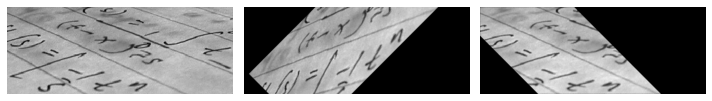

In [23]:
text = data.text()

tform = tf.SimilarityTransform(scale=1, rotation=math.pi/4,
                               translation=(text.shape[0]/2, -100))

rotated = tf.warp(text, tform)
back_rotated = tf.warp(rotated, tform.inverse)

fig, ax = plt.subplots(ncols=3,figsize=(10, 3))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[1].imshow(rotated, cmap=plt.cm.gray)
ax[2].imshow(back_rotated, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

### 2.3 Projective transformations
Try the effect of different projective transformations by using a the composition of two transformations. 
- One using a given matrix (where you can change the projective related parameters)
- A similarity transformation

[[1.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00]
 [1.e-04 9.e-04 1.e+00]]


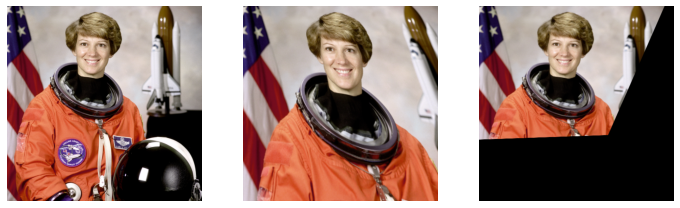

In [25]:
#text = data.text()
img = data.astronaut()

T = np.zeros((3,3)) 
T[0,0] = 1.
T[0,1] = 0.
T[0,2] = 0.

T[1,0] = 0.
T[1,1] = 1.
T[1,2] = 0.

T[2,0] = 0.0001
T[2,1] = 0.0009
T[2,2] = 1.

tform = tf.ProjectiveTransform(matrix = T)
print(tform.params)

#tform2 = tf.SimilarityTransform(scale=5, rotation=math.pi/4,translation=(10,10))
#tform = tf.ProjectiveTransform(matrix = np.matmul(tform.params, tform2.params))

transformed = tf.warp(img, tform)
back_transformed = tf.warp(transformed, tform.inverse)

fig, ax = plt.subplots(ncols=3, figsize=(10, 3))
ax[0].imshow(img, cmap=plt.cm.gray)
ax[1].imshow(transformed, cmap=plt.cm.gray)
ax[2].imshow(back_transformed, cmap=plt.cm.gray)
for a in ax:
    a.axis('off')
plt.tight_layout()

## 3. Homography parameter estimation

If we want to relate the coordinates of two planar objects we may use the ``estimate`` functionality of skimage in order to estimate the parametes of the transformation. Given two arrays of point-correspondences, it will use the **least-squares method** to find the best fitting parameters of an homography. Among other applications, homography estimation can be used for image registration or rectification.

In the example shown before we assume we want to recognize letters on a photograph which was not taken from the front but at a certain angle. In the simplest case of a plane paper surface the letters are projectively distorted. Simple matching algorithms would not be able to match such symbols. One solution to this problem is to warp the image so that the distortion is removed and then apply a matching algorithm.



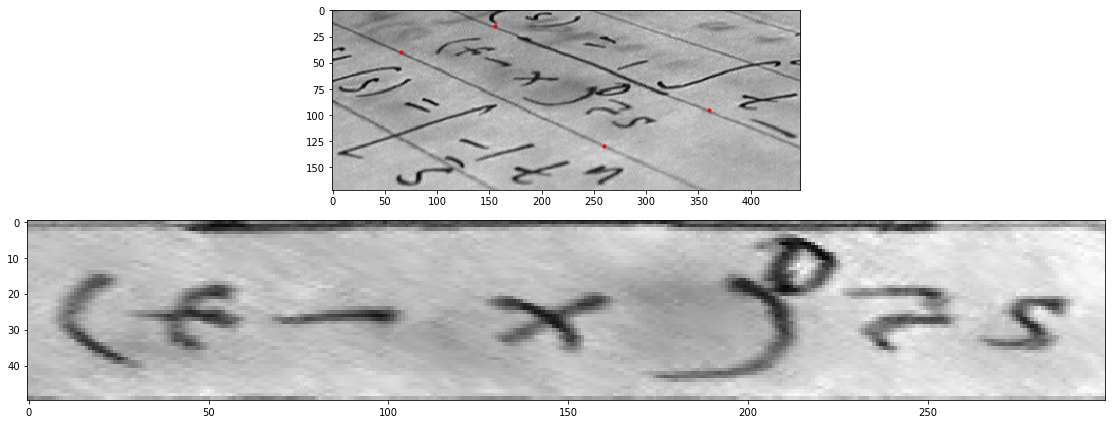

In [3]:
text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(16, 6))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

#for a in ax:
#    a.axis('off')

plt.tight_layout()

## 4. Augmented reality

Use the same procedure as in 2 to estimate the transformations allowing to

- create a starwars introductory text overlayed over the ``HyadesPleiades`` image, imagine the coordinates of the desired transformed plane to establish the point correspondences.
<TABLE>
   <TR>
    <TD><img src="HyadesPleiades.jpg" alt="drawing" width="300"/></TD>
    <TD><img src="starwars-text-v-short.png" alt="drawing" width="300"/></TD>
   </TR>
</TABLE>  
- exchange one of the frames inside the ``times-square`` and bring it to the ``museum`` (or visceversa).
<TABLE>
   <TR>
      <TD><img src="times-square.jpg" alt="drawing" width="300"/></TD>
      <TD><img src="museum.png" alt="drawing" width="300"/></TD>
   </TR>
</TABLE>   


In [6]:
**Bonus:** Find the transformation on your own solving for the A=h

SyntaxError: invalid syntax (<ipython-input-6-c5342b723daf>, line 1)

<span style='background :pink' > En s'inspirant du code donné dans l'exemple, on modifie dans un premier temps le texte en effectuant une projection. Pour cela, on utilise les points de départ et d'arrivée. </span>

<span style='background :pink' > On ajoute ensuite le texte sur le fond étoilé. Pour cela, on modifie les pixels du fond étoilé par ceux du texte lorsque la transparence n'est pas nulle. </span>

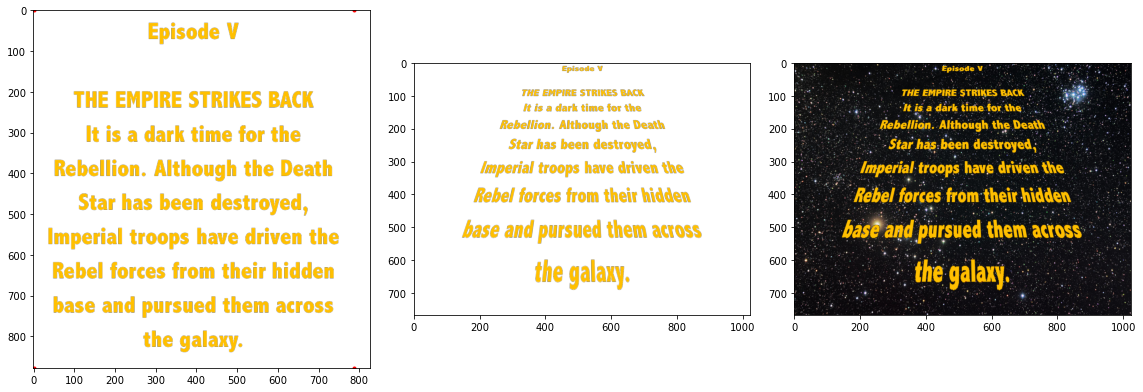

In [61]:
text = io.imread('starwars-text-v-short.png')
star = io.imread('HyadesPleiades.jpg')


src = np.array([[300, 0], [0, 767], [1023, 767], [724, 0]]) #coordonées de départ
dst = np.array([[0, 0], [0, 877], [787, 877], [787, 0]]) #coordonnées d'arrivée

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(768, 1024)) #projection du texte et redimensionnement adapté au fond étoilé

star_wars = star
for i in range(warped.shape[0]): 
    for j in range(warped.shape[1]):
        if warped[i,j,3]>0:
            star_wars[i,j,0:3]=255*warped[i,j,0:3] #ajout du texte sur le fond

fig, ax = plt.subplots(ncols=3, figsize=(16, 6))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)
ax[2].imshow(star_wars, cmap=plt.cm.gray)

#for a in ax:
#a.axis('off')

plt.tight_layout()

<span style='background :pink' > On effectue la même opération avec une affiche de Times Square. Cependant, dans ce cas il faut détourer l'affiche car sinon il y a des éléments de l'image originale qui restent. On attribue arbitrairement une valeur de 1000 aux éléments non désirés. </span>

<span style='background :pink' > On ajoute ensuite l'affiche sur l'image du musée, pour les pixels dont la valeur n'est pas de 1000. On remarque une légère différence de couleur de l'affiche dans l'image finale, qui est peut-être due au traitement de l'image par la fonction imshow. </span>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


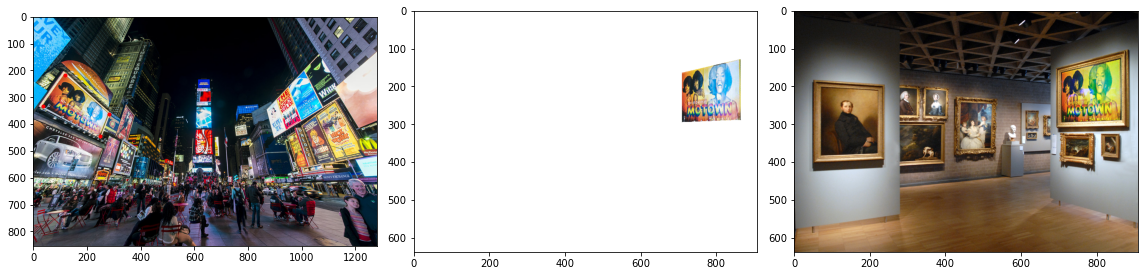

In [65]:
times = io.imread('times-square.jpg')
museum = io.imread('museum.png')


src = np.array([[707, 165], [708, 295], [863, 289], [862, 129]]) #coordonées de départ
dst = np.array([[116, 217], [35, 334], [248, 445], [281, 362]]) #coordonnées d'arrivée

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(times, tform3, output_shape=(638, 909)) #projection du texte et redimensionnement adapté au musée 


for [x1,y1,x2,y2] in [[708, 295, 863, 289],[707, 165, 708, 295]]: #détourage du tableau
    for x in range(909):
        for y in range(638):
            a=(y2-y1)/(x2-x1)
            b=y2-a*x2
            if y>a*x+b:
                warped[y,x]=1000
for [x1,y1,x2,y2] in [[863, 289, 862, 129],[862, 129,707, 165]]: #détourage du tableau
    for x in range(909):
        for y in range(638):
            a=(y2-y1)/(x2-x1)
            b=y2-a*x2
            if y<a*x+b:
                warped[y,x]=1000

                
museum_times = museum
for i in range(warped.shape[0]): 
    for j in range(warped.shape[1]):
        if warped[i,j,0]!=1000:
            museum_times[i,j,0:2]=255*warped[i,j,0:2] #ajout du texte sur le fond
            
fig, ax = plt.subplots(ncols=3, figsize=(16, 6))

ax[0].imshow(times, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)
ax[2].imshow(museum, cmap=plt.cm.gray)

#for a in ax:
#a.axis('off')

plt.tight_layout()